In [161]:
<<data/d3.wls

Running code with Wolfram Engine...

Tight constraints 1: [15, 20, 21]
Tight constraints 2: [15, 16, 21]
Tight constraints 3: [8, 16, 21]
Tight constraints 4: [13, 16, 21]

Dual Feasibility 1: tight constraints [15, 20, 21]
Dual Feasibility 1: 59/100 <= B <= 1
Dual Feasibility 1: 0 <= l <= (177*B)/200 - (267*B^2)/1000

Dual Feasibility 2: tight constraints [15, 20, 21]
Dual Feasibility 2: 0 <= B <= 59/100
Dual Feasibility 2: 0 <= l <= B*9/10

Dual Feasibility 3: tight constraints [15, 16, 21]
Dual Feasibility 3: 1/10 <= B <= 1/2
Dual Feasibility 3: B/2 <= l <= B*99/100

Dual Feasibility 4: tight constraints [8, 16, 21]
Dual Feasibility 4: 1/4 <= B <= 9/20
Dual Feasibility 4: B*49/50 <= l <= B*7/5-85/1000

Dual Feasibility 5: tight constraints [13, 16, 21]
Dual Feasibility 5: 26/100 <= B <= 36/100
Dual Feasibility 5: B*68/50-75/1000 <= l <= B*72/50-90/1000



-Graphics-
-Graphics-
-Graphics-
-Graphics-
{0.173942, data/tight1.svg}
{0.069653, data/tight2.svg}
{0.074238, data/tight3.svg}
{0.06484, data/tight4.svg}
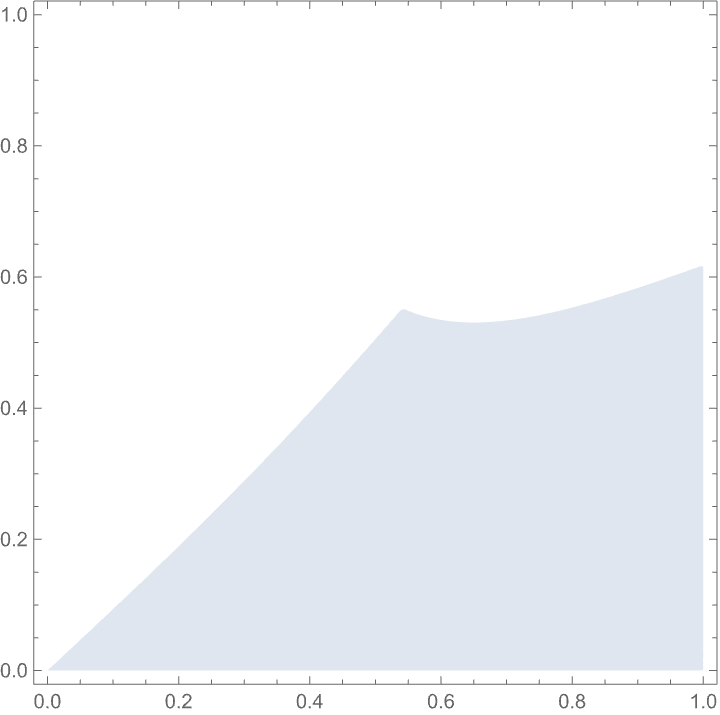
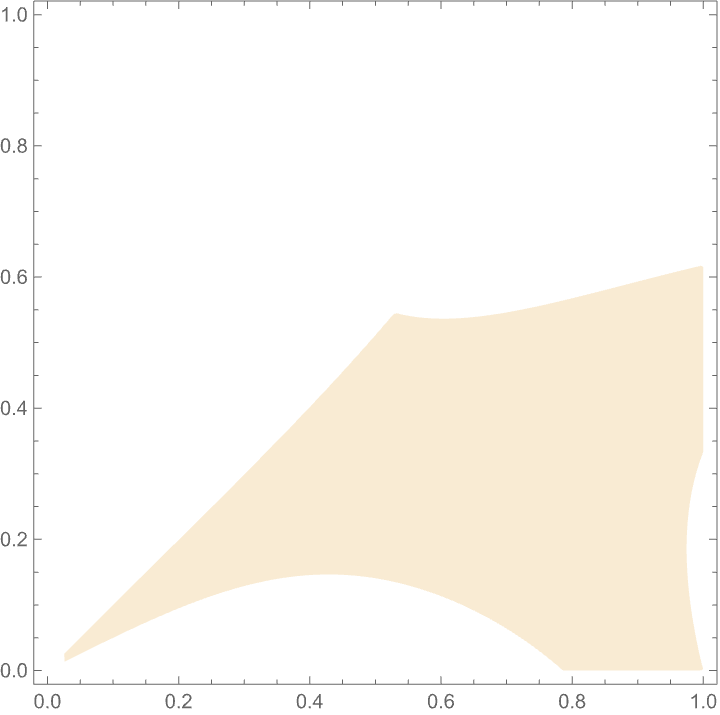
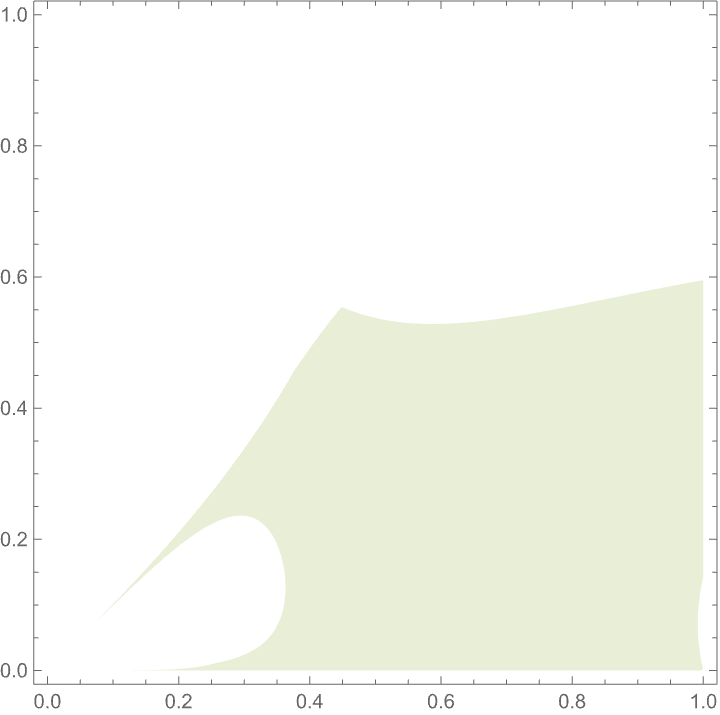
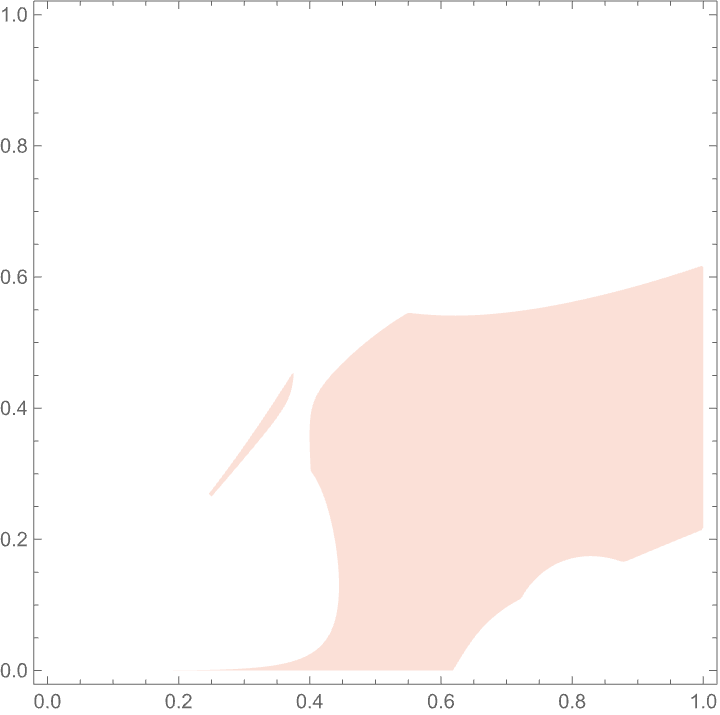
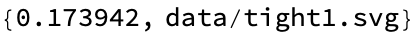
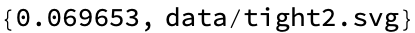
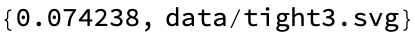
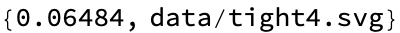

In [96]:
(* WARNING, SLOW *)
plc1 = Plot[lc[3,B], {B,0,   3/10}, PlotStyle->{Black, Thickness[0.005]}, PerformanceGoal->"Quality", WorkingPrecision->MachinePrecision, MaxRecursion->5, PlotPoints->100];
plc2 = Plot[lc[3,B], {B,3/10,1/3 }, PlotStyle->{Black, Thickness[0.005]}, PerformanceGoal->"Quality", WorkingPrecision->MachinePrecision, MaxRecursion->15, PlotPoints->10000];
plc = Show[plc1,plc2];
Export["data/plc.svg", plc]

tr1r = tr1 // ReleaseHold;
tr2r = tr2 // ReleaseHold;
tr3r = tr3 // ReleaseHold;
tr4r = tr4 // ReleaseHold;

Export["data/tight1.svg", tr1r];
Export["data/tight2.svg", tr2r];
Export["data/tight3.svg", tr3r];
Export["data/tight4.svg", tr4r];

trallr = Show[tr1r,tr2r,tr3r,tr4r];
dfall = Show[dfr1,dfr2,dfr3,dfr4,dfr5];

Show[trallr,dfall,plc]

-Graphics-
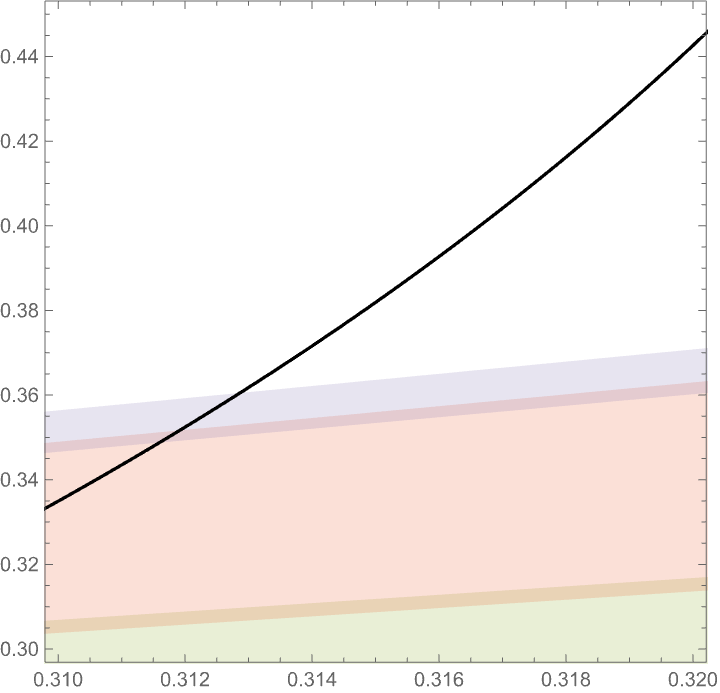

In [167]:
(* Example of how to investigate a dual feasibility region *)
Show[tr4r, plc, RegionPlot[26/100 <= B <= 36/100 && B*68/50-75/1000 <= l <= B*72/50-90/1000, {B,0,1},{l,0,1}, PlotPoints->200, MaxRecursion->4, BoundaryStyle->None], PlotRange->{{0.26,0.36},{1/5,0.45}}]
Show[dfr1,dfr2,dfr3,dfr4,dfr5,plc,PlotRange->{{0.31,0.32},{0.3,0.45}}]

In [384]:
Bc[d_] := (d-2)/d;
lc[d_, 0]  := 0;
lc[d_, B_] := Block[{r,s,Bca},(((1 + Sqrt[r s])/(1 - Sqrt[r s]))^((Bca + 1)/(Bca - 1)) (1 - Sqrt[r/s])/(1 + Sqrt[r/s]) 
            /. {r -> (Bca - B)/(Bca + B), 
                s -> (1 - B)/(1 + B)}
            /.Bca -> Bc[d])];

ZPet = B^15*l^10 + 10*B^12*l^9 + 15*B^11*l^8 + 30*B^10*l^7 + 30*B^9*l^8 + B^15 + 12*B^10*l^5 + 70*B^9*l^6 + 60*B^8*l^7 + 10*B^12*l + 15*B^11*l^2 + 30*B^10*l^3 + 70*B^9*l^4 + 120*B^8*l^5 + 75*B^7*l^6 + 30*B^6*l^7 + 30*B^9*l^2 + 60*B^8*l^3 + 75*B^7*l^4 + 60*B^6*l^5 + 60*B^5*l^6 + 30*B^6*l^3 + 60*B^5*l^4 + 60*B^4*l^5 + 5*B^3*l^6 + 5*B^3*l^4;
ZGOOSE = B^15*l^10 + 10*B^12*l^9 + B^13*l^6 + 4*B^12*l^7 + 15*B^11*l^8 + B^13*l^4 + 4*B^12*l^5 + 9*B^11*l^6 + 18*B^10*l^7 + 30*B^9*l^8 + B^15 + 4*B^12*l^3 + 9*B^11*l^4 + 20*B^10*l^5 + 40*B^9*l^6 + 72*B^8*l^7 + 10*B^12*l + 15*B^11*l^2 + 18*B^10*l^3 + 40*B^9*l^4 + 72*B^8*l^5 + 101*B^7*l^6 + 26*B^6*l^7 + 30*B^9*l^2 + 72*B^8*l^3 + 101*B^7*l^4 + 116*B^6*l^5 + 57*B^5*l^6 + 26*B^6*l^3 + 57*B^5*l^4 + 40*B^4*l^5 + 2*B^3*l^6 + 2*B^3*l^4;
ZK4 = B^6*l^4 + B^6 + 4*B^3*l^3 + 4*B^3*l + 6*B^2*l^2;

occPet = l * D[Log[ZPet],l]/10;
occGOOSE = l * D[Log[ZGOOSE],l]/10;
occK4 = l * D[Log[ZK4],l]/4;
                            
occs = {occK4,occGOOSE,occPet};
names = {"K4","GOOSE","Petersen"};

{RGBColor[0.368417, 0.506779, 0.709798], RGBColor[0.880722, 0.611041, 0.142051], 
 
>   RGBColor[0.560181, 0.691569, 0.194885], RGBColor[0.922526, 0.385626, 0.209179], 
 
>   RGBColor[0.528488, 0.470624, 0.701351], RGBColor[0.772079, 0.431554, 0.102387], 
 
>   RGBColor[0.363898, 0.618501, 0.782349], RGBColor[1, 0.75, 0], 
 
>   RGBColor[0.647624, 0.37816, 0.614037], RGBColor[0.571589, 0.586483, 0.], 
 
>   RGBColor[0.915, 0.3325, 0.2125], RGBColor[0.400822, 0.522007, 0.85], 
 
>   RGBColor[0.972829, 0.621644, 0.073362], RGBColor[0.736783, 0.358, 0.503027], 
 
>   RGBColor[0.280264, 0.715, 0.429209], RGBColor[0.368417, 0.506779, 0.709798], 
 
>   RGBColor[0.880722, 0.611041, 0.142051], RGBColor[0.560181, 0.691569, 0.194885], 
 
>   RGBColor[0.922526, 0.385626, 0.209179], RGBColor[0.528488, 0.470624, 0.701351], 
 
>   RGBColor[0.772079, 0.431554, 0.102387], RGBColor[0.363898, 0.618501, 0.782349], 
 
>   RGBColor[1, 0.75, 0], RGBColor[0.647624, 0.37816, 0.614037], 
 
>   RGBColor[0.571589, 0.586483, 0.], RGBColor[0.915, 0.3325, 0.2125], 
 
>   RGBColor[0.400822, 0.522007, 0.85], RGBColor[0.972829, 0.621644, 0.073362], 
 
>   RGBColor[0.736783, 0.358, 0.503027], RGBColor[0.280264, 0.715, 0.429209], 
 
>   RGBColor[0.368417, 0.506779, 0.709798], RGBColor[0.880722, 0.611041, 0.142051], 
 
>   RGBColor[0.560181, 0.691569, 0.194885], RGBColor[0.922526, 0.385626, 0.209179], 
 
>   RGBColor[0.528488, 0.470624, 0.701351], RGBColor[0.772079, 0.431554, 0.102387], 
 
>   RGBColor[0.363898, 0.618501, 0.782349], RGBColor[1, 0.75, 0], 
 
>   RGBColor[0.647624, 0.37816, 0.614037], RGBColor[0.571589, 0.586483, 0.], 
 
>   RGBColor[0.915, 0.3325, 0.2125], RGBColor[0.400822, 0.522007, 0.85], 
 
>   RGBColor[0.972829, 0.621644, 0.073362], RGBColor[0.736783, 0.358, 0.503027], 
 
>   RGBColor[0.280264, 0.715, 0.429209], RGBColor[0.368417, 0.506779, 0.709798], 
 
>   RGBColor[0.880722, 0.611041, 0.142051], RGBColor[0.560181, 0.691569, 0.194885], 
 
>   RGBColor[0.922526, 0.385626, 0.209179], RGBColor[0.528488, 0.470624, 0.701351], 
 
>   RGBColor[0.772079, 0.431554, 0.102387], RGBColor[0.363898, 0.618501, 0.782349], 
 
>   RGBColor[1, 0.75, 0], RGBColor[0.647624, 0.37816, 0.614037], 
 
>   RGBColor[0.571589, 0.586483, 0.], RGBColor[0.915, 0.3325, 0.2125], 
 
>   RGBColor[0.400822, 0.522007, 0.85], RGBColor[0.972829, 0.621644, 0.073362], 
 
>   RGBColor[0.736783, 0.358, 0.503027], RGBColor[0.280264, 0.715, 0.429209], 
 
>   RGBColor[0.368417, 0.506779, 0.709798], RGBColor[0.880722, 0.611041, 0.142051], 
 
>   RGBColor[0.560181, 0.691569, 0.194885], RGBColor[0.922526, 0.385626, 0.209179], 
 
>   RGBColor[0.528488, 0.470624, 0.701351], RGBColor[0.772079, 0.431554, 0.102387], 
 
>   RGBColor[0.363898, 0.618501, 0.782349], RGBColor[1, 0.75, 0], 
 
>   RGBColor[0.647624, 0.37816, 0.614037], RGBColor[0.571589, 0.586483, 0.], 
 
>   RGBColor[0.915, 0.3325, 0.2125], RGBColor[0.400822, 0.522007, 0.85], 
 
>   RGBColor[0.972829, 0.621644, 0.073362], RGBColor[0.736783, 0.358, 0.503027], 
 
>   RGBColor[0.280264, 0.715, 0.429209], RGBColor[0.368417, 0.506779, 0.709798], 
 
>   RGBColor[0.880722, 0.611041, 0.142051], RGBColor[0.560181, 0.691569, 0.194885], 
 
>   RGBColor[0.922526, 0.385626, 0.209179], RGBColor[0.528488, 0.470624, 0.701351], 
 
>   RGBColor[0.772079, 0.431554, 0.102387], RGBColor[0.363898, 0.618501, 0.782349], 
 
>   RGBColor[1, 0.75, 0], RGBColor[0.647624, 0.37816, 0.614037], 
 
>   RGBColor[0.571589, 0.586483, 0.], RGBColor[0.915, 0.3325, 0.2125], 
 
>   RGBColor[0.400822, 0.522007, 0.85], RGBColor[0.972829, 0.621644, 0.073362], 
 
>   RGBColor[0.736783, 0.358, 0.503027], RGBColor[0.280264, 0.715, 0.429209], 
 
>   RGBColor[0.368417, 0.506779, 0.709798], RGBColor[0.880722, 0.611041, 0.142051], 
 
>   RGBColor[0.560181, 0.691569, 0.194885], RGBColor[0.922526, 0.385626, 0.209179], 
 
>   RGBColor[0.528488, 0.470624, 0.701351], RGBColor[0.772079, 0.431554, 0.102387], 
 
>   RGBColor[0.363898, 0.618501, 0.782349], RGBColor[1, 0.75, 0], 
 
>   RGBCol
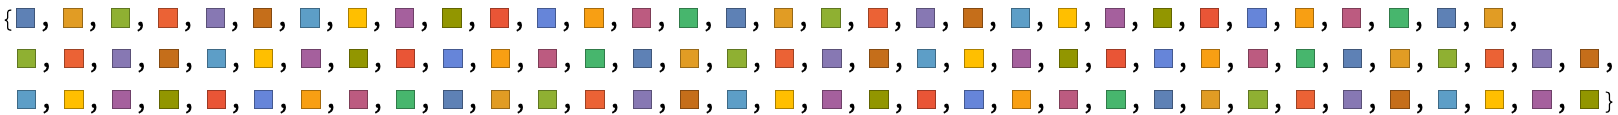

In [170]:
colors

18.1786
0.912575
7.53357
-Graphics-
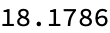
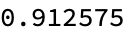
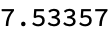
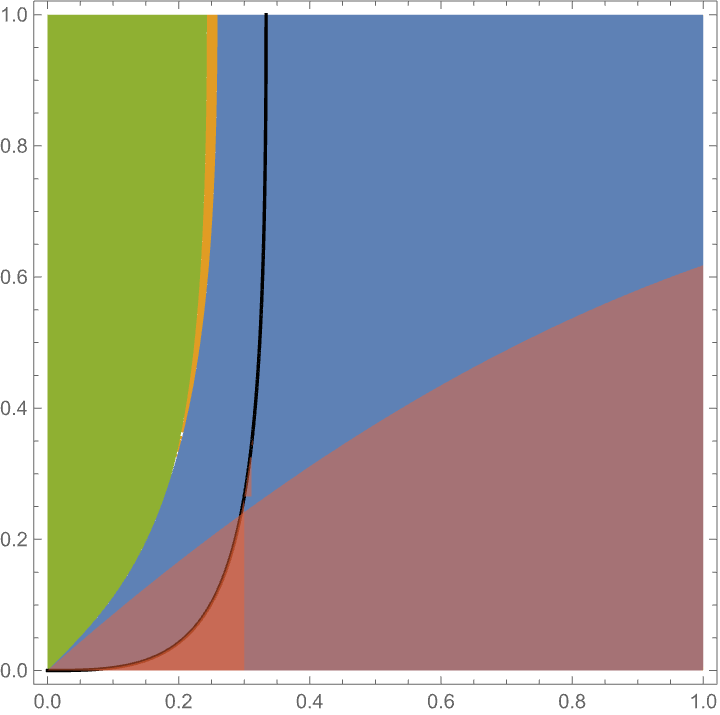

In [114]:
(* WARNING, SLOW *)
pK4    = RegionPlot[occK4 <= occGOOSE && occK4 <= occPet,     {B,0,1},{l,0,1}, PlotPoints->100, MaxRecursion->4, PlotStyle->colors[[2]], BoundaryStyle->None];
pGOOSE = RegionPlot[occGOOSE <= occK4 && occGOOSE <= occPet,  {B,0,1},{l,0,1}, PlotPoints->100, MaxRecursion->4, PlotStyle->colors[[3]], BoundaryStyle->None];
pPet   = RegionPlot[occPet <= occGOOSE && occPet <= occK4,    {B,0,1},{l,0,1}, PlotPoints->100, MaxRecursion->4, PlotStyle->colors[[5]], BoundaryStyle->None];
Show[pK4,pGOOSE,pPet,plc]
Show[pK4,pGOOSE,pPet,plc,dfall]


MaxRecursion: 2, PlotPoints: 20


{-Graphics-, -Graphics-, -Graphics-, -Graphics-}
{-Graphics-, -Graphics-, -Graphics-, -Graphics-}
{-Graphics-, -Graphics-, -Graphics-, -Graphics-}
{-Graphics-, -Graphics-, -Graphics-, -Graphics-}
{-Graphics-, -Graphics-, -Graphics-, -Graphics-}
{-Graphics-, -Graphics-}
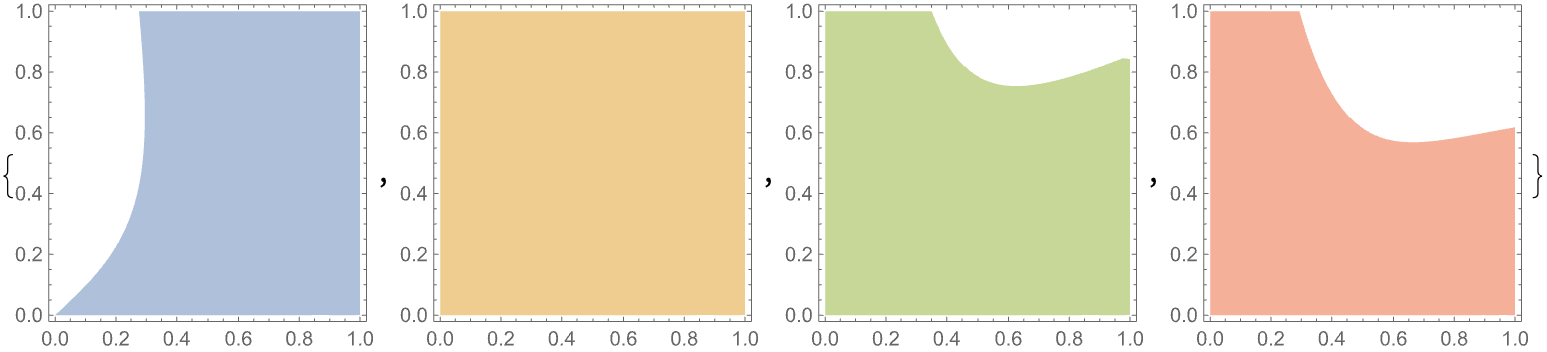
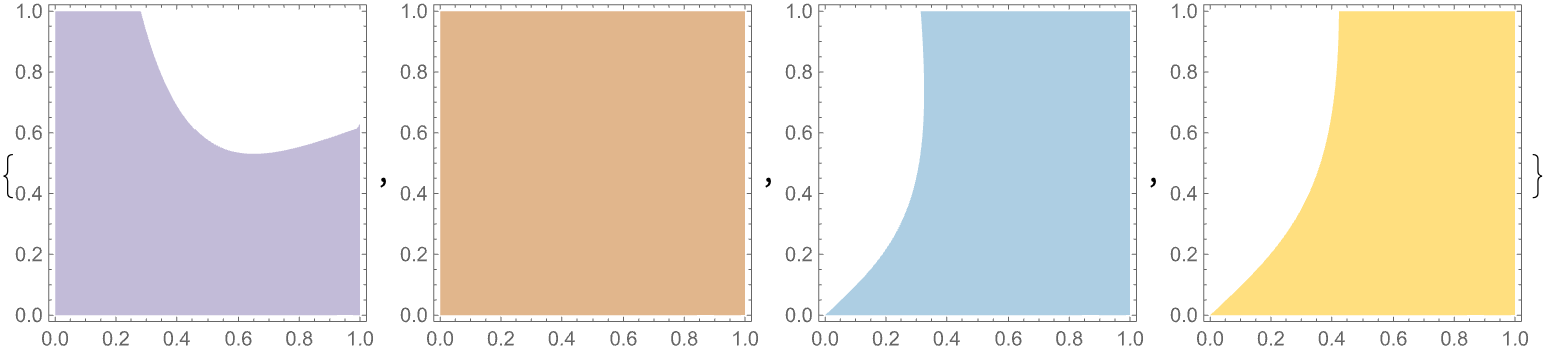
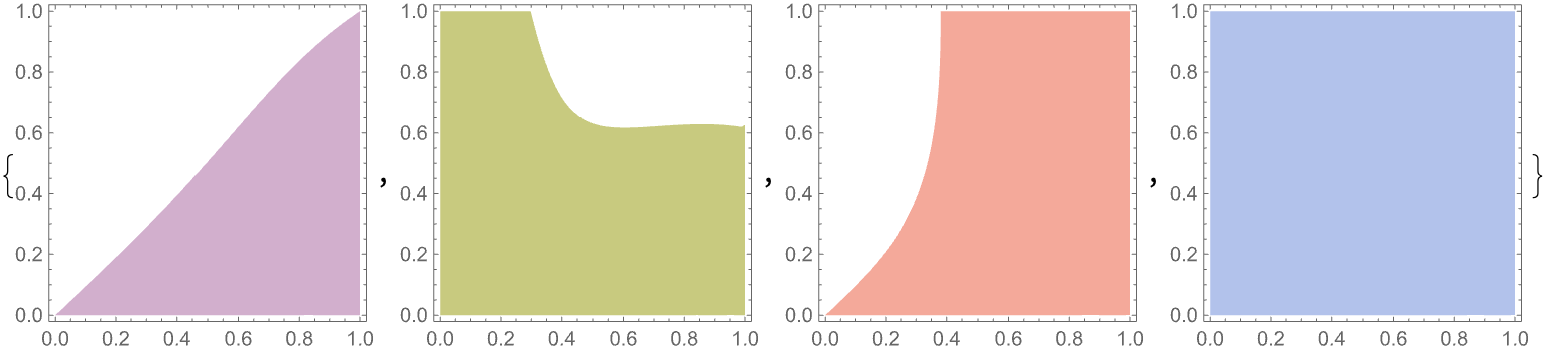
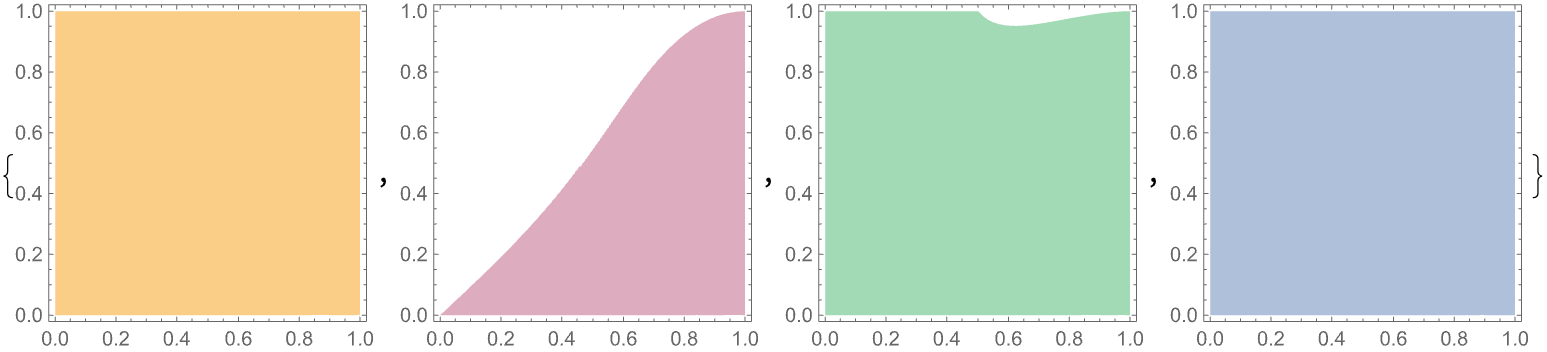
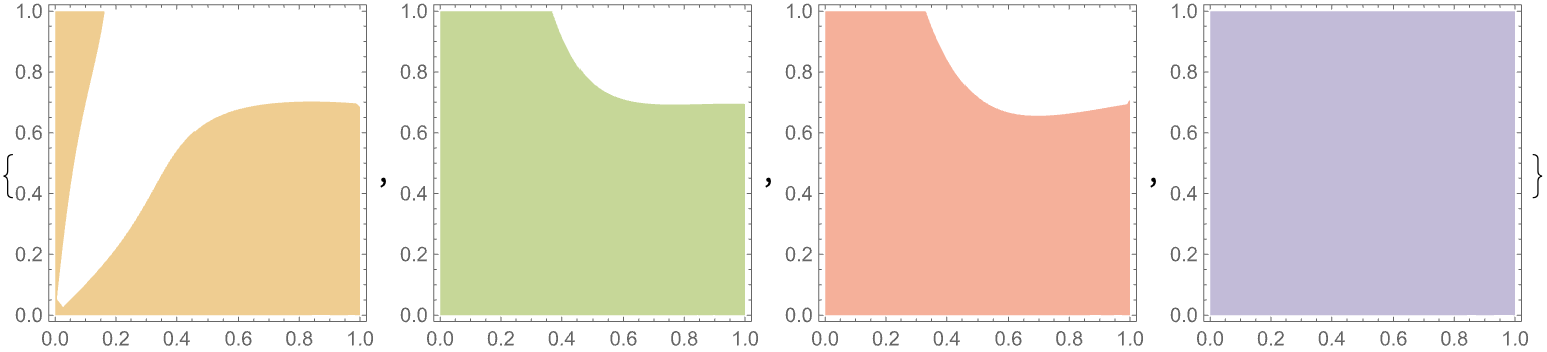
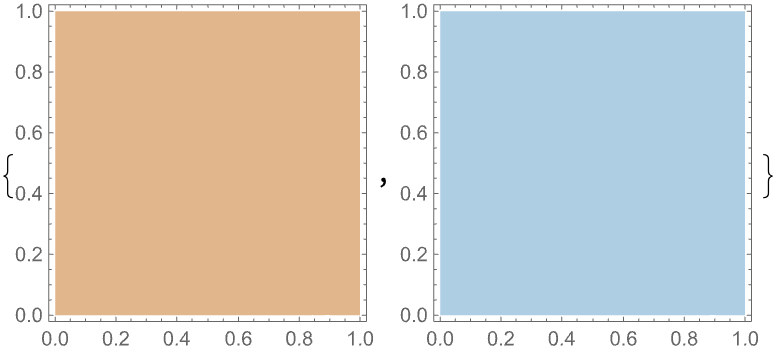

In [400]:
mr = 2;
pp = 20;
Print["MaxRecursion: ", mr, ", PlotPoints: ", pp]
t1 = Table[RegionPlot[ineqs1[[i]], {B,0,1}, {l,0,1}, PlotPoints->pp, MaxRecursion->mr, BoundaryStyle->None, PlotStyle->{Directive[colors[[i]],Opacity[0.5]]}], {i,Range[Length[ineqs1]]}];
tchunks = Partition[t1, UpTo[4]];
tchunks[[1]]
tchunks[[2]]
tchunks[[3]]
tchunks[[4]]
tchunks[[5]]
tchunks[[6]]


MaxRecursion: 4, PlotPoints: 30


{-Graphics-, -Graphics-, -Graphics-}
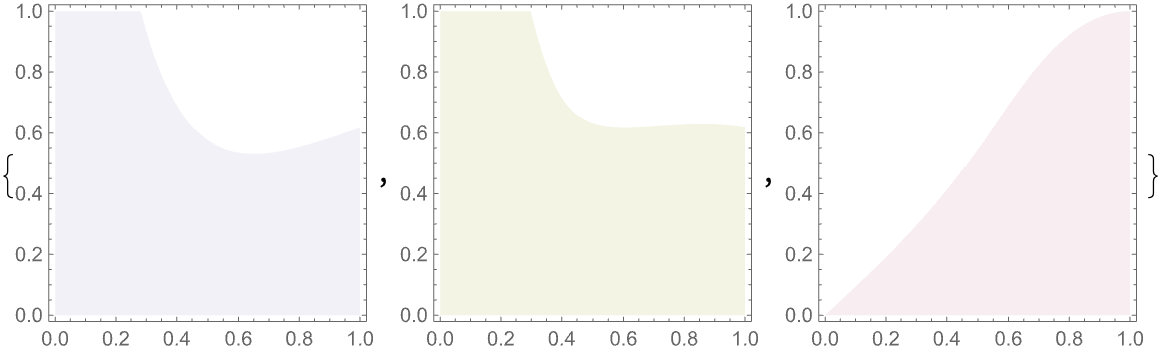

In [436]:
mr = 4;
pp = 30;
Print["MaxRecursion: ", mr, ", PlotPoints: ", pp]
important = {5,10,14};
t11 = Table[RegionPlot[ineqs1[[i]], {B,0,1}, {l,0,1}, PlotPoints->pp, MaxRecursion->mr, BoundaryStyle->None, PlotStyle->{Directive[colors[[i]],Opacity[0.1]]}],{i,important}]

-Graphics-
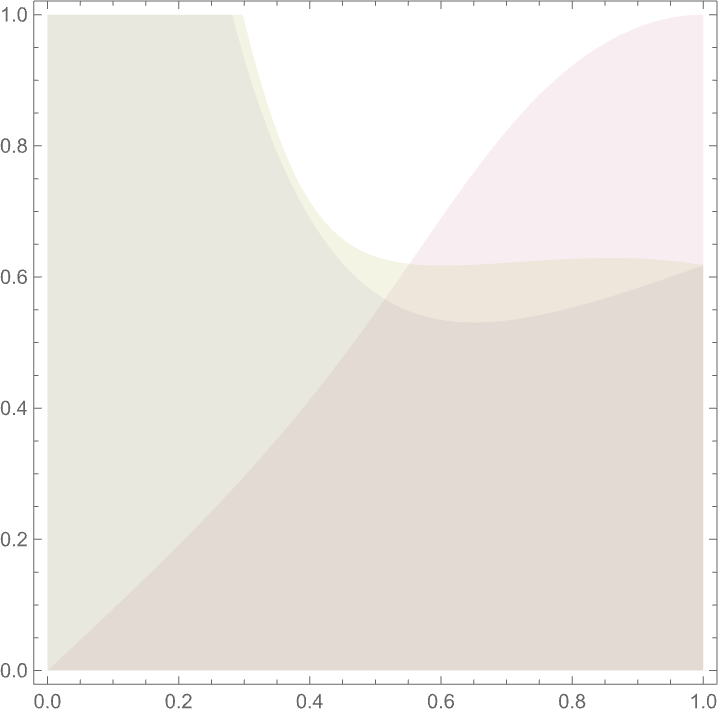

In [441]:
Show @@ t11

-Graphics-
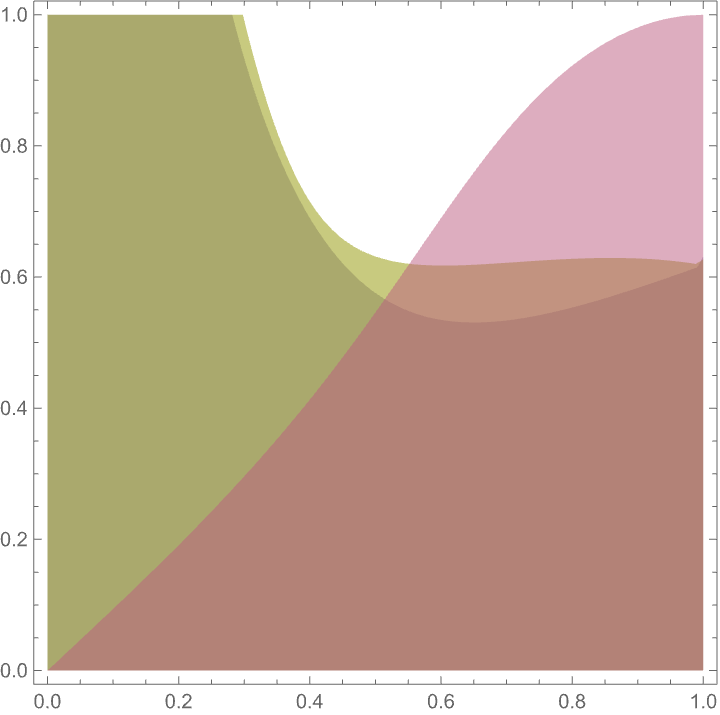

In [435]:
Show[t1[[5]],t1[[10]],t1[[14]]]